# Protein Localization (Classification)

The data constitutes some attributes about the cells from different plants and the target attribute is the cellular localization site of proteins (non-numeric). There are 10 classes, 8 attributes (features) and 1484 instances. No missing values.


Class distribution (unbalanced):
-  CYT (cytosolic or cytoskeletal)                    463
-  NUC (nuclear)                                      429
-  MIT (mitochondrial)                                244
-  ME3 (membrane protein, no N-terminal signal)       163
-  ME2 (membrane protein, uncleaved signal)            51
-  ME1 (membrane protein, cleaved signal)              44
-  EXC (extracellular)                                 37
-  VAC (vacuolar)                                      30
-  POX (peroxisomal)                                   20
-  ERL (endoplasmic reticulum lumen)                    5

## TEAMMATES
#### Sri Vaishnavi Kudikalla(UF55532)
#### Amulya Potluri

Build a ML system to predict the correct class for a given sample.To achieve this, we used various ML classification algorithms to compare which algorithm can predict the best result possible. Data Visualization,feature selection,paramter tuning and ensembling are the  approaches used.

# More About Dataset

## Protein Localization

Protein Localization is the process of determining where in the cell a protein is located (for example, in membranes, in the nucleus, in mitochondria, etc...)

The abbreviations for the classes correspond to different cellular compartments or locations where proteins can be found. Here is a breakdown of the abbreviations and their meanings:

CYT (cytosolic or cytoskeletal): Proteins located in the cytosol or associated with the cytoskeleton.

NUC (nuclear): Proteins located within the nucleus of a cell.

MIT (mitochondrial): Proteins localized to the mitochondria, which are organelles responsible for energy production in the cell.

ME3 (membrane protein, no N-terminal signal): Membrane proteins that are inserted into the cellular membrane but do not have a signal sequence at their N-terminus.

ME2 (membrane protein, uncleaved signal): Membrane proteins that have a signal sequence at their N-terminus but have not been cleaved after insertion into the membrane.

ME1 (membrane protein, cleaved signal): Membrane proteins that have a signal sequence at their N-terminus, which is cleaved after the protein is inserted into the membrane.

EXC (extracellular): Proteins that are secreted or localized outside of the cell.

VAC (vacuolar): Proteins located within vacuoles, which are membrane-bound compartments involved in storage, transport, or degradation of cellular components.

POX (peroxisomal): Proteins localized to peroxisomes, which are organelles involved in various metabolic processes, including lipid metabolism and detoxification.

ERL (endoplasmic reticulum lumen): Proteins localized within the lumen, or interior, of the endoplasmic reticulum (ER), which is involved in protein synthesis, folding, and modification.

These abbreviations are used in protein localization to describe the subcellular localization of proteins.



### Importing Libraries

In [1]:
#importing all the necessary libraries.
from collections import Counter
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

### Downloading the dataset

In [2]:
#Retreiving the data from git repository
!git clone https://github.com/cvrg-iyte/DATA602repo.git
#loading the data into data variable
protein_df = pd.read_csv("./DATA602repo/proteinlocalization.data", header=None, delim_whitespace=True)
protein_df = protein_df.drop(0, axis=1)
protein_df.head()

fatal: destination path 'DATA602repo' already exists and is not an empty directory.


,1,2,3,4,5,6,7,8,9
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


The last column is the class names, so we are converting this column into a target array (y). we can also prefer to convert them into numerical class values as well like class 0, class 1, etc.



## Data Preproccessing

In [3]:
#Displays the rows count and column count
protein_df.shape

(1484, 9)

In [4]:
#Drop the Duplicate values
protein_df.drop_duplicates()

,1,2,3,4,5,6,7,8,9
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
...,...,...,...,...,...,...,...,...,...
1479,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2
1480,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC
1481,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2
1482,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC


In [5]:
#displays some basic statistical details like percentile, mean, std, min, max, etc.
protein_df.describe()

,1,2,3,4,5,6,7,8
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.500121,0.499933,0.500034,0.261186,0.504717,0.007500,0.499885,0.276199
std,0.137299,0.123924,0.086670,0.137098,0.048351,0.075683,0.057797,0.106491
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


In [6]:
#Displays the columns data types
protein_df.dtypes

1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
9     object
dtype: object

### Renaming the target class values

In [7]:
from sklearn.preprocessing import LabelEncoder

#acquiring the target variables from last column of dataframe
target = protein_df.columns[-1]
label_encoder = LabelEncoder()

# Fit and transform the target column in the DataFrame
protein_df[target] = label_encoder.fit_transform(protein_df[target])

# Retrieving original class names and their corresponding numerical values
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
for class_name, class_value in mapping.items():
    print(f"Class '{class_name}' is converted to class '{class_value}'.")


Class 'CYT' is converted to class '0'.
Class 'ERL' is converted to class '1'.
Class 'EXC' is converted to class '2'.
Class 'ME1' is converted to class '3'.
Class 'ME2' is converted to class '4'.
Class 'ME3' is converted to class '5'.
Class 'MIT' is converted to class '6'.
Class 'NUC' is converted to class '7'.
Class 'POX' is converted to class '8'.
Class 'VAC' is converted to class '9'.


The above code uses LabelEncoder from the scikit-learn library to convert class names(categorical values) into numerical values for a multi-class classification problem. 

In [8]:
protein_df.head()

,1,2,3,4,5,6,7,8,9
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,6
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,6
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,6
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,7
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,6


### Assigning  column names

In [9]:
protein_df.columns = ['feature #1', 'feature #2', 'feature #3', 'feature #4', 'feature #5', 'feature #6', 'feature #7', 'feature #8','target']
#Displays the first 5 rows in dataframe
protein_df.head()

,feature #1,feature #2,feature #3,feature #4,feature #5,feature #6,feature #7,feature #8,target
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,6
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,6
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,6
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,7
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,6


The code assigns column names to DataFrame.






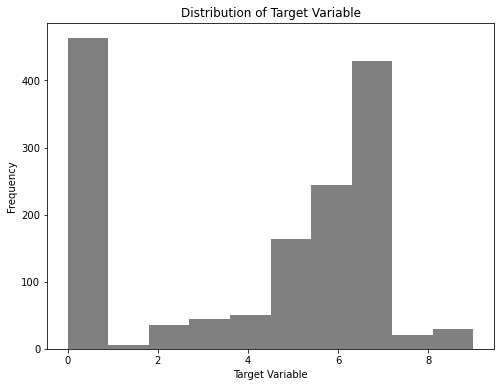

In [10]:
# Ditribution of the target variable
target_values = protein_df['target']
plt.figure(figsize=(8, 6))
plt.hist(target_values, bins=10, color='gray')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.show()


### Correlation Matrix

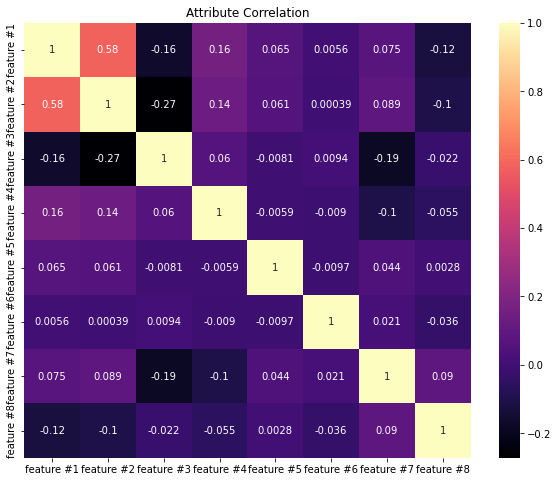

In [11]:
#Correlation matrix
df=protein_df.drop('target',axis=1)
correlation_matrix = df.corr()
#fixing the plot size
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma')
#Plot title
plt.title('Attribute Correlation')
#Displays the plot
plt.show()


Feature #1 has the highest positive correlation

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

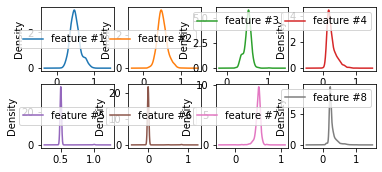

In [12]:
Density_df=protein_df.drop('target',axis=1)
Density_df.plot(kind='density', subplots=True, layout=(3,4), sharex=False, sharey=False)

The code creates a density plot for each feature column in the DataFrame dfX. The resulting plot is a 3x4 grid of subplots, with each subplot representing a different feature column. Density plots display the distribution of values for each feature, allowing us to see the shape of the data and identify any outliers or unusual patterns

# Model Evaluation

In [13]:
X = protein_df.iloc[:, 0:8].values
y = protein_df.iloc[:, 8].values
column_names = list(protein_df.columns[:8])

#### Checking the accuray with respect to different algorithms

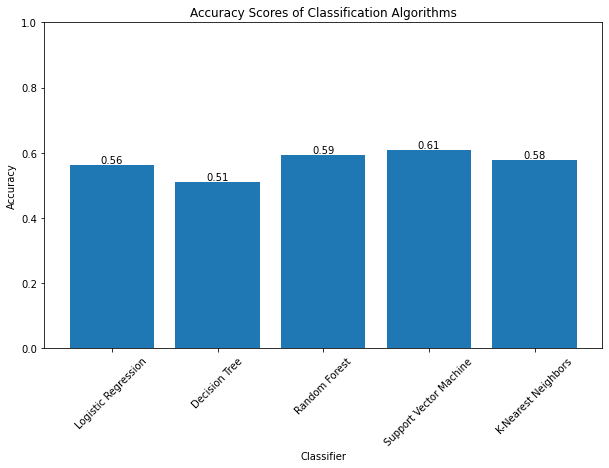

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier())]

classifier_names = []
classifer_accuracy_scores = []

for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classifier_names.append(name)
    classifer_accuracy_scores.append(accuracy)
    
plt.figure(figsize=(10, 6))
bars = plt.bar(classifier_names, classifer_accuracy_scores)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Classification Algorithms')
plt.xticks(rotation=45)
plt.ylim([0, 1])
for bar, score in zip(bars, classifer_accuracy_scores):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{score:.2f}', ha='center', va='bottom')

plt.show()




In [15]:
classifer_accuracy_scores

[0.5627802690582959,
 0.5112107623318386,
 0.594170403587444,
 0.6076233183856502,
 0.57847533632287]

From the above code, we have evaluated the performance of six different classification algorithms including Logistic Regression, Decision Tree, Random Forest, Support Vector Machine and  K-Nearest Neighbors on a given dataset.It is observed that Logistic Regression, Random Forest and SVM provides higher accuravies compared to other classifiers





## Feature Selection

In [17]:
from sklearn.model_selection import cross_val_score

# Number of features

n_features = X.shape[1]  


list_of_accuracies = []

for subset_size in range(1, n_features + 1):  
    start_index = 0  

    feature_indices = range(start_index, start_index + subset_size)
    selected_features = X[:, feature_indices]
    selected_feature_names = [column_names[i] for i in feature_indices]

    classifier = SVC()

    #  cross-validation and  accuracy
    scores = cross_val_score(classifier, selected_features, y, cv=5)  # Using 5-fold cross-validation
    accuracy = np.mean(scores)

    list_of_accuracies.append(accuracy)

    print("Features Selected:", selected_feature_names)
    print("Corresponding Accuracy:", accuracy)
    print()

    start_index += 1


Features Selected: ['feature #1']
Corresponding Accuracy: 0.35310082810082816

Features Selected: ['feature #1', 'feature #2']
Corresponding Accuracy: 0.37061379561379565

Features Selected: ['feature #1', 'feature #2', 'feature #3']
Corresponding Accuracy: 0.45821048321048324

Features Selected: ['feature #1', 'feature #2', 'feature #3', 'feature #4']
Corresponding Accuracy: 0.5383792883792885

Features Selected: ['feature #1', 'feature #2', 'feature #3', 'feature #4', 'feature #5']
Corresponding Accuracy: 0.5390526890526891

Features Selected: ['feature #1', 'feature #2', 'feature #3', 'feature #4', 'feature #5', 'feature #6']
Corresponding Accuracy: 0.537037037037037

Features Selected: ['feature #1', 'feature #2', 'feature #3', 'feature #4', 'feature #5', 'feature #6', 'feature #7']
Corresponding Accuracy: 0.5336700336700336

Features Selected: ['feature #1', 'feature #2', 'feature #3', 'feature #4', 'feature #5', 'feature #6', 'feature #7', 'feature #8']
Corresponding Accuracy: 0.

From the above code, we have performed feature selection using cross-validation and SVM classifier. We have iterated over each possible set of features and computed the accuracy of the classifier using 5-fold cross-validation. The output shows the selected features and the corresponding accuracy for each subset size. As we increase the number of selected features, the accuracy also increases up to a certain point, after which it starts decreasing. The final output shows that using all 8 features gives the highest accuracy of 0.599.






#### Thus there is no need of feature selection as highest accuracy is achieved only when all the features are considered

## Hyperparameter Tunning

Best parameters for Logistic Regression: {'C': 50}
Best parameters for Decision Tree: {'max_depth': 5}
Best parameters for Random Forest: {'max_depth': 50, 'n_estimators': 500}
Best parameters for Support Vector Machine: {'C': 1, 'kernel': 'rbf'}
Best parameters for K-Nearest Neighbors: {'n_neighbors': 20}


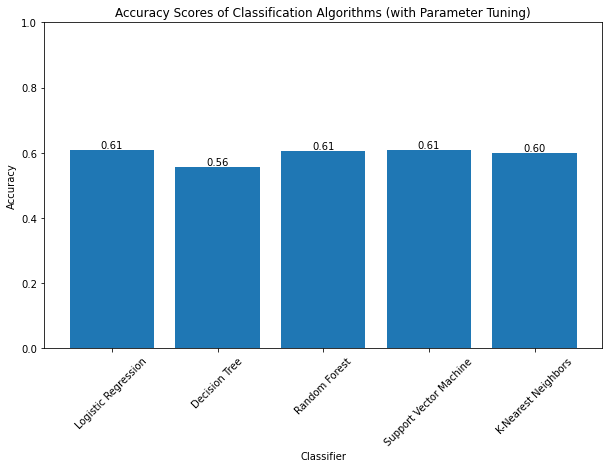

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Parameter grids for each classifier
lr_params = {'C': [0.01, 0.05, 0.1, 0.5, 1.0, 3, 10, 50, 100]}
dt_params = {'max_depth': [5, 10, 20, 50, None]}
rf_params = {'n_estimators': [100, 200, 500], 'max_depth': [5, 10, 20, 50, None]}
svm_params = {'C': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']}
knn_params = {'n_neighbors': [3, 5, 10, 20]}

# List of parameter grids and classifiers
param_grids = [lr_params, dt_params, rf_params, svm_params, knn_params]
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier())]

classifier_names = []
PT_accuracy_scores = []
best_params_dict = {}

# Grid search cross-validation for each classifier
for i, (name, classifier) in enumerate(classifiers):
    param_grid = param_grids[i]
    grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_params_dict[name] = best_params
    best_classifier = classifier.set_params(**best_params)
    best_classifier.fit(X_train, y_train)
    y_pred = best_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classifier_names.append(name)
    PT_accuracy_scores.append(accuracy)

    print(f"Best parameters for {name}: {best_params}")

plt.figure(figsize=(10, 6))
bars = plt.bar(classifier_names, PT_accuracy_scores)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Classification Algorithms (with Parameter Tuning)')
plt.xticks(rotation=45)
plt.ylim([0, 1])
for bar, score in zip(bars, PT_accuracy_scores):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{score:.2f}', ha='center', va='bottom')

plt.show()


The above code performs parameter tuning for the classification algorithms using GridSearchCV with different parameter grids. 
After paramter tunning there is marginal increse in accuracies of logostic regression and decision tree


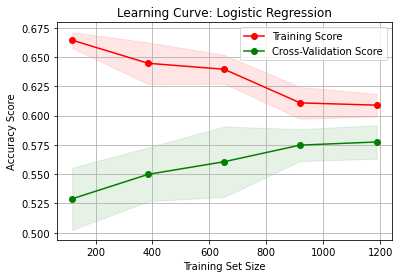

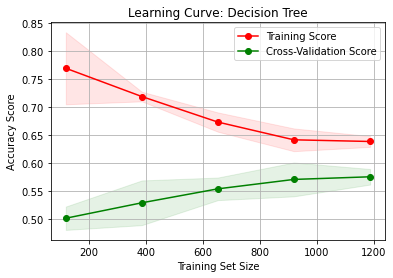

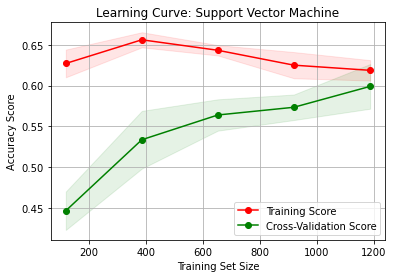

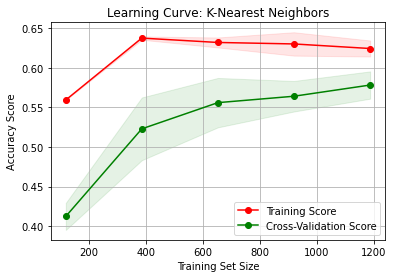

In [19]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# List of classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

# Plot learning curves for each classifier
for name, classifier in classifiers:
    best_params = best_params_dict[name]
    classifier.set_params(**best_params)
    train_sizes, train_scores, test_scores = learning_curve(classifier, X, y, cv=5, scoring='accuracy')
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-Validation Score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy Score')
    plt.title(f'Learning Curve: {name}')
    plt.legend(loc='best')
    plt.grid(True)

plt.show()


Logistic Regression,Decision Tree,SVM and KNN converge fairly quickly,with incresing training data. 

The plot  concludes that there is not much improvement in the model accuracy even after parameter tuninning. The accuracies of Logistic Regression, Random forest and KNN have increased marginally.





## Ensembling
Ensembling in Python refers to a technique in machine learning where multiple models are combined to improve the overall performance of the prediction. The basic idea is that the combined predictions of several models are often more accurate than the prediction of a single model.

In [20]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

LR_Model = LogisticRegression(random_state=1, max_iter=1000)
RFC_Model = RandomForestClassifier(random_state=1)
SVC_Model = SVC()
KNC_Model = KNeighborsClassifier()

model = VotingClassifier(estimators=[('lr', LR_Model), ('rfc', RFC_Model), ('svc', SVC_Model), ('knn', KNC_Model)], voting='hard')
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)

best_model = None
best_model_name = None
best_accuracy = 0.0

for model_name, model_instance in model.named_estimators_.items():
    model_accuracy = model_instance.score(X_test, y_test)
    if model_accuracy > best_accuracy:
        best_accuracy = model_accuracy
        best_model = model_instance
        best_model_name = model_name

print("Voting Classifier Accuracy:", accuracy)
print("Best Model:", best_model_name)
print("Best Model Accuracy:", best_accuracy)



Voting Classifier Accuracy: 0.6076233183856502
Best Model: rfc
Best Model Accuracy: 0.6143497757847534


We have implemented an ensemble learning method called Voting Classifier to combine the predictions of multiple machine learning models. We have used four classifiers (Logistic Regression, Random Forest, SVM, and KNN) and combined their predictions using a majority vote. 




### Analyzing the top 3 most occured classes in test set

In [21]:
# Train the Random Forest classifier
RFC_Model.fit(X_train, y_train)
# Predict the class labels for the test data
y_pred = RFC_Model.predict(X_test)
class_counts = Counter(y_pred)
# Get the top three most frequent classes
top_classes = class_counts.most_common(3)
# Print the top three most frequent classes
print("Top three most frequent classes:")
for class_label, count in top_classes:
    print("Class:", class_label, "Count:", count)


Top three most frequent classes:
Class: 0 Count: 146
Class: 7 Count: 129
Class: 6 Count: 71


In [22]:
least_frequent_class = min(class_counts, key=class_counts.get)
# Print the least frequent class and its count
print("Least frequent class:", least_frequent_class)
print("Count:", class_counts[least_frequent_class])

Least frequent class: 9
Count: 1


Proteins located within vacuoles are observed least

In Conclusion

-  The dataset consists of 9 different classes.
-  The best accuracy is acquired only when all the features are considered.
-  Logistic Regression, Random Forest,SVM and KNN are the best performing algorithms when comapred to Decison Tree Classifier.
- Random Forest Classifier has the highest accuracy from  base model evaluation.
-  There is marginal increase in accuracies of Logistic Regression, SVM and KNN after paramter tunning. 
-  Based on the accuracy of voting classifer the best perfroming algorithm is Random Forest Classifier.
-  Least perfroming classifier is decision tree
